In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm


# Find the correct font path
font_path = "/usr/share/fonts/truetype/stix2/STIXTwoText-Regular.ttf"  # Update path if needed
stix_font = fm.FontProperties(fname=font_path)

# Apply the font globally
plt.rcParams["font.family"] = stix_font.get_name()
#plt.rcParams["text.usetex"] = True

from scipy.optimize import curve_fit

In [31]:
# Functions for plotting, linear regression fit line for convergence

def reference_line_func(h_values, scaling_factor, slope):

    return scaling_factor * h_values ** slope

def fit_reference_line(h_values, error_values):

    popt, _ = curve_fit(reference_line_func, h_values, error_values, p0=[1, 1])

    scaling_factor, slope = popt
    return scaling_factor, slope

In [32]:
df = pd.read_csv('all_2D_1forms_simulation_results.csv')

In [33]:
h_list = df['hmax'].unique()
order_list = df['order'].unique()
Cw_list = df['C_w'].unique()
nDof_list = df['ndof'].unique()

print(h_list)
print(order_list)
print(Cw_list)
print(nDof_list)

[0.1767767  0.08838835 0.04419417 0.02209709]
[1 2 3 4 5]
[ 1.          1.58489319  2.51188643  3.98107171  6.30957344 10.
 15.84893192 25.11886432 39.81071706 63.09573445]
[   78   214   422   702  1054   282   794  1594  2682  4058  1050  3034
  6170 10458 15898  4026 11834 24250 41274 62906]


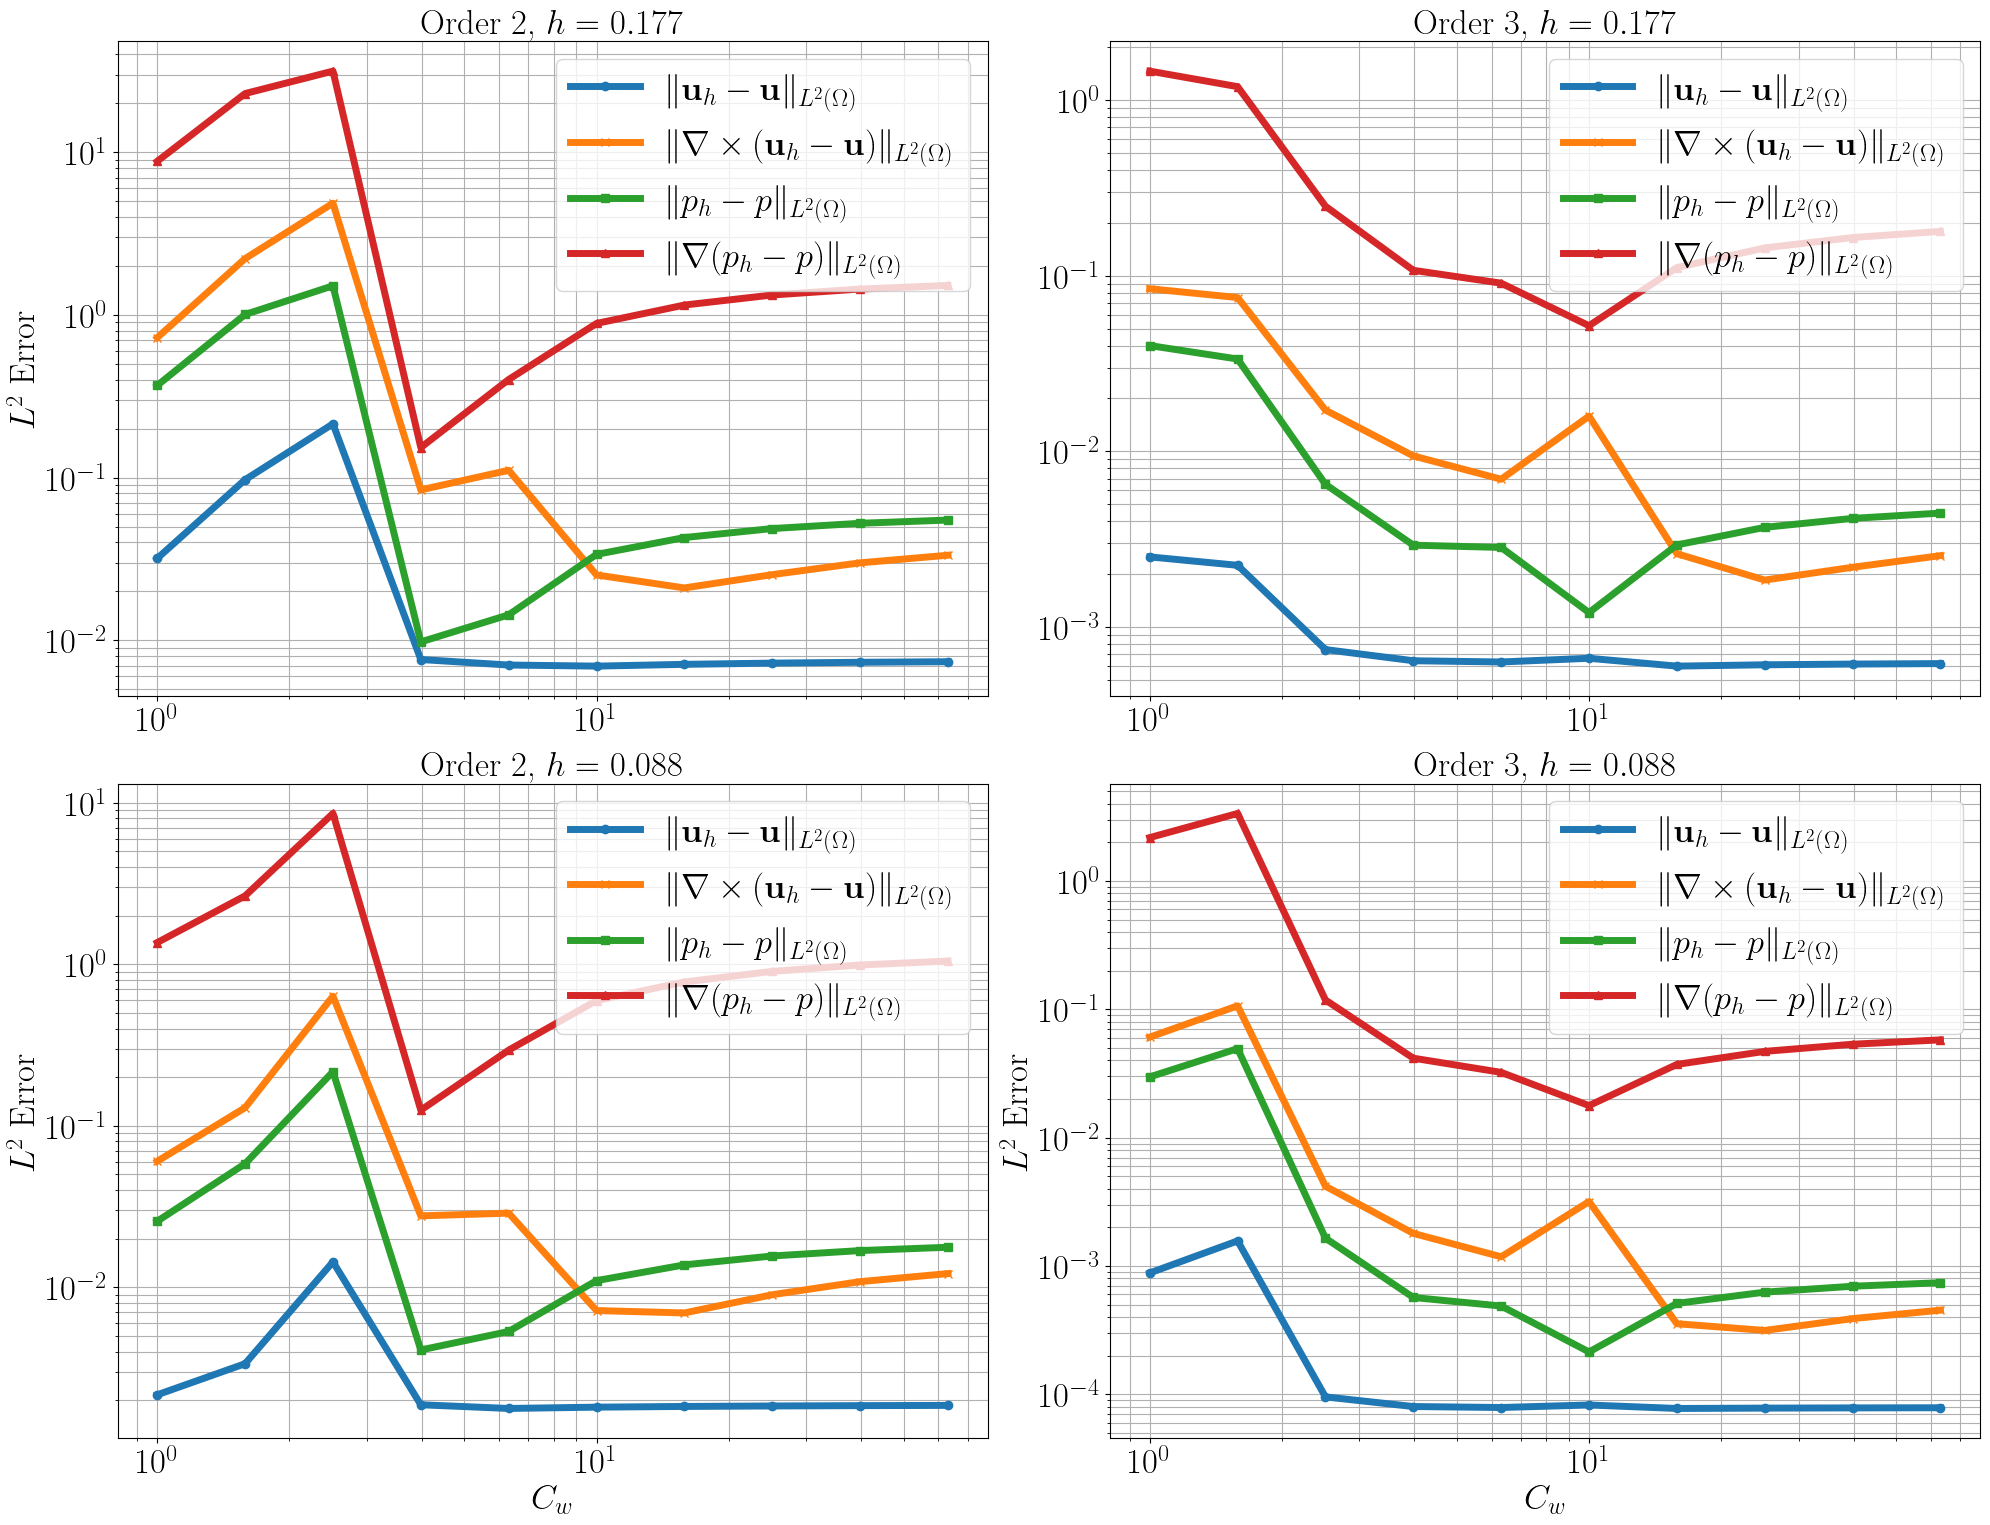

In [34]:
# Example settings
saveFigure1 = True
font_size = 25
line_width = 5
y_min, y_max = 1e-3, 12

# Explicitly chosen hmax values for the two refinement steps
chosen_hmax_1 = h_list[0]
chosen_hmax_2 = h_list[1]  # change to your desired second hmax

# Explicit orders
order1 = order_list[1]
order2 = order_list[2]

# Filter the dataframe for the first refinement step
df_refinement1 = df[df['hmax'] == chosen_hmax_1]
df_order1_h1 = df_refinement1[df_refinement1['order'] == order1]
df_order2_h1 = df_refinement1[df_refinement1['order'] == order2]

# Filter the dataframe for the second refinement step
df_refinement2 = df[df['hmax'] == chosen_hmax_2]
df_order1_h2 = df_refinement2[df_refinement2['order'] == order1]
df_order2_h2 = df_refinement2[df_refinement2['order'] == order2]

# Create a 2x2 grid of subplots: first row for chosen_hmax_1, second for chosen_hmax_2
fig, axs = plt.subplots(2, 2, figsize=(20, 16))

# --- First row: hmax = chosen_hmax_1 ---

# Order 1
ax = axs[0, 0]
ax.plot(
    df_order1_h1['C_w'], df_order1_h1['L2_error_u'],
    label=r'$\Vert \mathbf{u}_h - \mathbf{u} \Vert_{L^2(\Omega)}$', marker='o', linewidth=line_width
)
ax.plot(
    df_order1_h1['C_w'], df_order1_h1['L2_error_curl_u'],
    label=r'$\Vert \nabla \times (\mathbf{u}_h - \mathbf{u}) \Vert_{L^2(\Omega)}$', marker='x', linewidth=line_width
)
ax.plot(
    df_order1_h1['C_w'], df_order1_h1['L2_error_p'],
    label=r'$\Vert p_h - p \Vert_{L^2(\Omega)}$', marker='s', linewidth=line_width
)
ax.plot(
    df_order1_h1['C_w'], df_order1_h1['L2_error_grad_p'],
    label=r'$\Vert \nabla (p_h - p) \Vert_{L^2(\Omega)}$', marker='^', linewidth=line_width
)
ax.set_xscale('log')
ax.set_yscale('log')
#ax.set_xlabel('$C_w$', fontsize=font_size)
ax.set_ylabel('$L^2$ Error', fontsize=font_size)
ax.set_title(f'Order {order1}, $h = {round(chosen_hmax_1, 3)}$', fontsize=font_size)
ax.grid(True, which='both', axis='both')
ax.legend(fontsize=font_size, loc='upper right')
ax.tick_params(axis='both', which='major', labelsize=font_size)
#ax.set_ylim(y_min, y_max)

# Order 2
ax = axs[0, 1]
ax.plot(
    df_order2_h1['C_w'], df_order2_h1['L2_error_u'],
    label=r'$\Vert \mathbf{u}_h - \mathbf{u} \Vert_{L^2(\Omega)}$', marker='o', linewidth=line_width
)
ax.plot(
    df_order2_h1['C_w'], df_order2_h1['L2_error_curl_u'],
    label=r'$\Vert \nabla \times (\mathbf{u}_h - \mathbf{u}) \Vert_{L^2(\Omega)}$', marker='x', linewidth=line_width
)
ax.plot(
    df_order2_h1['C_w'], df_order2_h1['L2_error_p'],
    label=r'$\Vert p_h - p \Vert_{L^2(\Omega)}$', marker='s', linewidth=line_width
)
ax.plot(
    df_order2_h1['C_w'], df_order2_h1['L2_error_grad_p'],
    label=r'$\Vert \nabla (p_h - p) \Vert_{L^2(\Omega)}$', marker='^', linewidth=line_width
)
ax.set_xscale('log')
ax.set_yscale('log')
#ax.set_xlabel('$C_w$', fontsize=font_size)
#ax.set_ylabel('$L^2$ Error', fontsize=font_size)
ax.set_title(f'Order {order2}, $h = {round(chosen_hmax_1, 3)}$', fontsize=font_size)
ax.grid(True, which='both', axis='both')
ax.legend(fontsize=font_size, loc='upper right')
ax.tick_params(axis='both', which='major', labelsize=font_size)
#ax.set_ylim(y_min, y_max)

# --- Second row: hmax = chosen_hmax_2 ---

# Order 1
ax = axs[1, 0]
ax.plot(
    df_order1_h2['C_w'], df_order1_h2['L2_error_u'],
    label=r'$\Vert \mathbf{u}_h - \mathbf{u} \Vert_{L^2(\Omega)}$', marker='o', linewidth=line_width
)
ax.plot(
    df_order1_h2['C_w'], df_order1_h2['L2_error_curl_u'],
    label=r'$\Vert \nabla \times (\mathbf{u}_h - \mathbf{u}) \Vert_{L^2(\Omega)}$', marker='x', linewidth=line_width
)
ax.plot(
    df_order1_h2['C_w'], df_order1_h2['L2_error_p'],
    label=r'$\Vert p_h - p \Vert_{L^2(\Omega)}$', marker='s', linewidth=line_width
)
ax.plot(
    df_order1_h2['C_w'], df_order1_h2['L2_error_grad_p'],
    label=r'$\Vert \nabla (p_h - p) \Vert_{L^2(\Omega)}$', marker='^', linewidth=line_width
)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('$C_w$', fontsize=font_size)
ax.set_ylabel('$L^2$ Error', fontsize=font_size)
ax.set_title(f'Order {order1}, $h = {round(chosen_hmax_2, 3)}$', fontsize=font_size)
ax.grid(True, which='both', axis='both')
ax.legend(fontsize=font_size, loc='upper right')
ax.tick_params(axis='both', which='major', labelsize=font_size)
#ax.set_ylim(y_min, y_max)

# Order 2
ax = axs[1, 1]
ax.plot(
    df_order2_h2['C_w'], df_order2_h2['L2_error_u'],
    label=r'$\Vert \mathbf{u}_h - \mathbf{u} \Vert_{L^2(\Omega)}$', marker='o', linewidth=line_width
)
ax.plot(
    df_order2_h2['C_w'], df_order2_h2['L2_error_curl_u'],
    label=r'$\Vert \nabla \times (\mathbf{u}_h - \mathbf{u}) \Vert_{L^2(\Omega)}$', marker='x', linewidth=line_width
)
ax.plot(
    df_order2_h2['C_w'], df_order2_h2['L2_error_p'],
    label=r'$\Vert p_h - p \Vert_{L^2(\Omega)}$', marker='s', linewidth=line_width
)
ax.plot(
    df_order2_h2['C_w'], df_order2_h2['L2_error_grad_p'],
    label=r'$\Vert \nabla (p_h - p) \Vert_{L^2(\Omega)}$', marker='^', linewidth=line_width
)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('$C_w$', fontsize=font_size)
ax.set_ylabel('$L^2$ Error', fontsize=font_size)
ax.set_title(f'Order {order2}, $h = {round(chosen_hmax_2, 3)}$', fontsize=font_size)
ax.grid(True, which='both', axis='both')
ax.legend(fontsize=font_size, loc='upper right')
ax.tick_params(axis='both', which='major', labelsize=font_size)
#ax.set_ylim(y_min, y_max)

#/home/tellocam/CSE/669d3f0cd841266ae157f88f/figures/plots/1forms/2D/2D_1forms_Cw_figure1.pdf
#/home/tellocam/CSE/master_thesis/dataPrep2D/2D_1forms_Cw_figure1.pdf

plt.tight_layout(rect=[0, 0, 1, 0.96])
if saveFigure1:
    fig.savefig('../../669d3f0cd841266ae157f88f/figures/plots/1forms/2D/2D_1forms_Cw_figure1.pdf', format='pdf',transparent=True, bbox_inches='tight')
